> 1. > # HyperParameter
***DRL for stock trading*:**
Deep Reinforcement Learning for Automated Stock Trading
Using reinforcement learning to trade multiple stocks through Python and OpenAI Gym

In [2]:
#input_shape=(Memoryin_window_length,ob_space_Length,window)
Memoryin_window_length      = 10
window                      = 360
ob_space_Length             = 5
actions                     = 3
MemoryLimit                 = 1000000
#----------------------------------------------------------- 
fee                         = 3.0
SL                          = 25.0
TP                          = 25.0
#------------------------------------------------------------
steps = 1000
Looping = 2
sIndex                        = 4000
eIndex                        = 1600000    # MAX = 3.490.000 [ 290.000 Traning 200 Evalation]


In [ ]:
from google.colab import drive ; drive.mount('/content/drive')

In [ ]:
!pip install gym keras keras-rl2 tensorflow==2.1

In [3]:
import os
import pandas as pd 
from datetime import datetime as dt
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
from numpy import loadtxt
from datetime import datetime
from numpy import savetxt
import random ; from random import randint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Flatten 
from tensorflow.keras.optimizers import Adam
from rl.policy import * ; from rl.memory import * ; from rl.agents import *

ModuleNotFoundError: ignored

# Reloud AI

In [5]:
#os.chdir("/content/drive/MyDrive") 

#data = loadtxt('DATA2/data.csv', delimiter=',') 
#info = loadtxt('DATA2/info.csv', delimiter=',')  

data = loadtxt('2015_2021_M1_US30All.csv', delimiter=',' , encoding='utf-16') 
#data = loadtxt('US30_from2021.csv', delimiter=',' , encoding='utf-16')
prices = data[:,1]
dates = data[:,0]
dates = dates.astype(int)
len(prices)

1940371

In [6]:
def GrapheV15(stats):
    plt.figure(figsize=(16, 9)) 
    x = stats[:,0]
    y = np.arange(0,len(x) ) 
    plt.plot(  y ,   x   , label="US30 Line" )
    plt.plot(  y ,  stats[:,1]    , label="US30 Line" )
    plt.plot(  y ,  stats[:,2]    , label="US30 Line" )
    plt.plot(  y ,  stats[:,3]    , label="US30 Line" )
    plt.plot(  y ,  stats[:,4]    , label="US30 Line" )
    plt.show()
def GrapheV16(price):
    plt.figure(figsize=(16, 9)) 
    x = price
    y = np.arange(0,len(x) ) 
    plt.plot(  y ,   x   , label="US30 Line" )
    plt.show()    
def showV409(nb):
  x = []
  y = []
  p = 0
  s = 0
  for i in range(0, len(env.R)  ):
    for j in range( 0 , len(env.R[i])   ):
      s = s + env.R[i][j]
      if ( env.R[i][j] != 0 ):
        x.append(s)
        y.append(p)
        p = p + 1
  k = nb
  l = 0
  print( ' All Rewards : {} \n'.format(  x[ len(x)-1 ]  ) )
  for i in range(0,k):
    m = int (len(x)/k )
    x1 = x[ l:(m + m*i) ]
    y1 = y[ l:(m + m*i) ]
    plt.figure(figsize=(16, 9))
    plt.plot( y1, x1, label="US30 Line") 
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.title("Line Graph Example")
    plt.show()  # 200
    l = (m + m*i)    
def ShowReward(nb,AllReward):
  x = []
  y = []
  p = 0
  s = 0
  for i in range(0, len(AllReward)  ):
    if ( AllReward[i] != 0 ):
      s+=AllReward[i]
      x.append(s)
      y.append(p)
      p = p + 1
  k = nb
  l = 0
  if(len(x)>2):
    print( ' All Rewards : {} \n'.format(  x[ len(x)-1 ]  ) )
  for i in range(0,k):
    m = int (len(x)/k )
    x1 = x[ l:(m + m*i) ]
    y1 = y[ l:(m + m*i) ]
    plt.figure(figsize=(16, 9))
    plt.plot( y1, x1, label="US30 Line") 
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.title("Line Graph Example")
    plt.show()  # 200
    l = (m + m*i)         

In [7]:
def build_model(ob_space_Length, window, actions,Memoryin_window_length):
    model = Sequential()
    model.add(Dense(128,activation='relu', input_shape=(Memoryin_window_length,ob_space_Length,window) ) )
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions))
    return model    
def build_agent(model, actions,Memoryin_window_length):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit= MemoryLimit , window_length=Memoryin_window_length)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000 ,
                   gamma=0.95 
                  )
    return dqn  
model = build_model(ob_space_Length, window, actions,Memoryin_window_length)
model.summary()
dqn = build_agent(model, actions,Memoryin_window_length)
dqn.compile( Adam(lr=1e-4))    
#name  = '19/WSaveddqn_19-37-03.h5f'
#dqn.load_weights(name)    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 5, 128)        46208     
_________________________________________________________________
dense_1 (Dense)              (None, 10, 5, 256)        33024     
_________________________________________________________________
dense_2 (Dense)              (None, 10, 5, 256)        65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10, 5, 128)        32896     
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 19203     
Total params: 197,123
Trainable params: 1

In [8]:
def isShort( indexStart ):
  global prices , TP , SL , fee
  res = -1
  index = 1 #min + random.randint(0, 3)
  min = indexStart
  max = min+ 4000
  for i in range(min,max):
    if( prices[i] <= (prices[min]-TP) ):
      res = TP - fee
      index = i - min  
      break
    if( prices[i] >= (prices[min]+SL) ):
      res = -SL 
      index = i - min    
      break
  if( res == -1 ):
    print("XLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLX")  
    res = -SL -fee
    index = max - min
  return [res , index]
def isLong( indexStart ):
  global prices , TP , SL , fee
  res = -1
  index = 1 #min + random.randint(1, 3)
  min = indexStart
  max = min+ 4000
  for i in range(min,max):
    if( prices[i] >= (prices[min]+TP) ):
      res = TP - fee
      index = i - min   
      break
    if( prices[i] <= (prices[min]-SL) ):
      res = -SL 
      index = i - min   
      break
  if( res == -1 ):
    print("XLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLX")  
    res = -SL -fee
    index = max - min
  return [res , index]  

In [9]:
def SMAOLD(Data,Periodes):
    n = len(Data)-1 
    res = [Data[0]]
    for i in range(0,n):
      iSMA = 0
      for j in range(i,i+Periodes):
        if(j>=n):
          iSMA = iSMA +Data[n]
        else:
          iSMA = iSMA + Data[j]
      iSMA = iSMA/Periodes  
      res.append(iSMA)
    return res 

In [10]:
def getStats(price_):
  res  = []
  sma5 =  SMAOLD( price_, 5  )
  sma10 = SMAOLD( price_, 10 )
  sma20 = SMAOLD( price_, 20 )
  sma50 = SMAOLD( price_, 50 )
  for i in range(0,len(price_)):
    res.append( [ price_[i] ,sma5[i],sma10[i],sma20[i],sma50[i]  ] )
  res     = np.array(res)  
  #ma = res.max()
  #mi = res.min()
  ma = price_[0]+6000
  mi = price_[0]-6000
  #print(ma-mi)
  res = ( res - mi )/(ma - mi) 
  return res

Testing for 10 episodes ...
 1 : 0  
--->:2601:<---
Episode 1: reward: 6.000, steps: 43
 1 : 43  
--->:3902:<---
Episode 2: reward: -336.000, steps: 36
 1 : 36  
--->:5210:<---
Episode 3: reward: -162.000, steps: 14
 1 : 14  
--->:6516:<---
Episode 4: reward: 24.000, steps: 31
 1 : 31  
--->:7820:<---
Episode 5: reward: 121.000, steps: 29
 1 : 29  
--->:9124:<---
Episode 6: reward: 94.000, steps: 47
 1 : 47  
--->:10426:<---
Episode 7: reward: -113.000, steps: 44
 1 : 44  
--->:11730:<---
Episode 8: reward: -36.000, steps: 71
 1 : 71  
--->:13036:<---
Episode 9: reward: -238.000, steps: 49
 1 : 49  
--->:14339:<---
Episode 10: reward: -99.000, steps: 19
 All Rewards : -761.0 



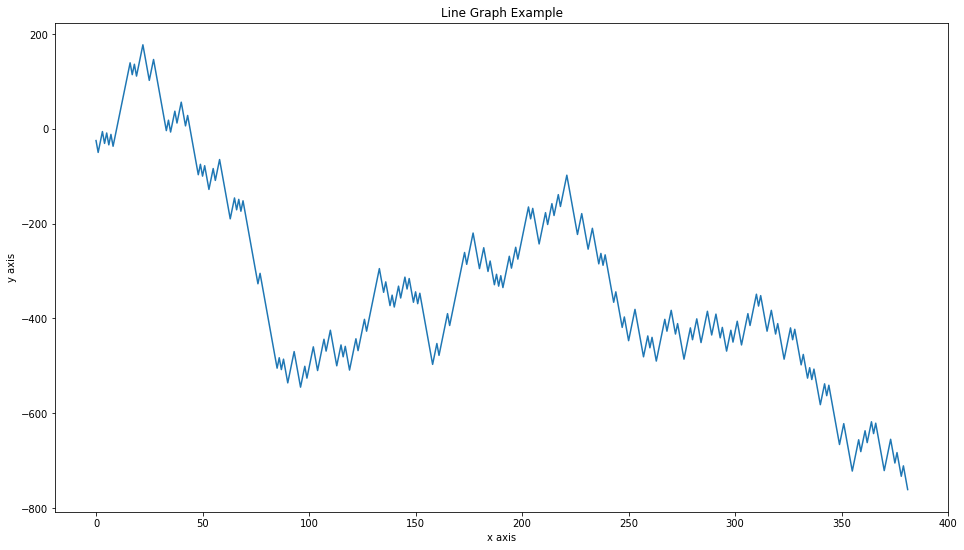

In [11]:
class env1(Env ):
    def __init__(self,  prices  ,tp_,sl_, ifTesting):
         #------------  observation_space  observation_space --------------------------------------------
        global ob_space_Length , window  , fee , sIndex , eIndex 
        self.windowM1 = window   # 360Min = 6H (Best View) 
        self.prices = prices
        self.observation_space = Box(low= 0.0, high= 1.0, shape=( ob_space_Length ,self.windowM1), dtype=np.float64 )
        self.action_space = Discrete(3)
 
        #------------  Parameters --------------------------------------------
        self.DayStep =  1300 #1380
        self.startIndex = sIndex
        self.iwin = 0               # iWindow [ 0 - (length_data - window ) ]
        self.SL = sl_
        self.TP = tp_
        self.ifTesting = ifTesting
        self.nbtrade0 = 0
        self.nbtrade1 = 0
 
        self.R      = []
        self.Rmin   = []
 
    def step(self, action):
        reward = 0
        
        iaccPrice = self.startIndex  + self.windowM1 + self.iwin
        
        accPrice = self.prices[iaccPrice]
        newprice = 0
        
        if(action==0):# sell
          reward , index = isShort( iaccPrice  )
          self.iwin+=index
          if( reward>0 ):
            self.nbtrade1+=1
          else:
            self.nbtrade0+=1
          
        
        if(action==1):# Buy
          reward , index = isLong( iaccPrice  )
          self.iwin+=index
          if( reward>0 ):
            self.nbtrade1+=1
          else:
            self.nbtrade0+=1
           
        if(action==2):# none
          reward = 0
          self.iwin = self.iwin + 1
 
        
        
        # Check if shower is done
        if self.iwin >= ( self.DayStep - self.windowM1 -1  ) :
            done = True
            if( self.ifTesting==1 ):
              for i in range( len(self.Rmin) , 100 ):
                self.Rmin.append(0)
              self.R.append(self.Rmin)  
              self.Rmin = []
           
        else:
            done = False
        info_ = {}
        i2 = iaccPrice - self.startIndex
        i1 = iaccPrice - self.windowM1 - self.startIndex
        #print( ' Action : {} __  i1 : {} '.format(action,i1) )
        self.state = np.transpose( self.DayStats[i1:i2] )
        #GrapheV15(   np.transpose( self.state) )
        if(self.ifTesting==1):
          self.Rmin.append( reward )
        return self.state, reward, done, info_
 
    def render(self):
       r=0
         
    def reset(self):
        self.iwin = 0
        self.startIndex += self.DayStep + random.randint(1, 10) 
        d1 = self.startIndex
        d2 = d1 + self.DayStep +  random.randint(5, 10) 
        self.DayStats  = getStats( prices[d1:d2] )

        i1 = self.iwin
        i2 = self.windowM1 + self.iwin
        
        self.state = np.transpose( self.DayStats[i1:i2]  )

        if( d2 > eIndex  ):
          self.startIndex = sIndex
        #GrapheV15(self.DayStats)
        #GrapheV16(self.prices[d1:d2])
        # Reset shower time
        print( ' 1 : {}  '.format(self.nbtrade1+self.nbtrade0) )
        print('--->:{}:<---'.format( self.startIndex  ))
        self.nbtrade0 = 0
        self.nbtrade1 = 0
        return self.state
#-----------------------------------------------------------------
 
sIndex                        = 1300
eIndex                        = 100000
env = env1(    prices , TP, SL,1)
_ = dqn.test(env, nb_episodes=10  , visualize=False)
 
showV409(1)

In [ ]:
lon = 10000
d1 = 1000000
d2 = d1 +lon
for i in range(0,100):
    u = getStats( prices[d1:d2] )
    d1 = d2
    d2 = d1 + lon
    print(' --> {} '.format(d2))

In [2]:
# hjgh
sIndex                        = 2000
eIndex                        = 1600000
env = env1(    prices , TP, SL,0)
FileVersion = "WSaved/Aminev7/"
time = datetime.now()
time = time.strftime("%H-%M-%S")
render = 0
steps = 500000
Looping = 1
NameSaving = "testing"
for i in range(0,Looping):
  dqn.fit(env, nb_steps=steps, visualize=False, verbose=2)
  time_ = datetime.now()
  time_ = time_.strftime("%H-%M-%S")
  NameSaving = FileVersion+time_+'/' +"WSaveddqn_"+str(time_)+".h5f"
  print('IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII') 
  print(NameSaving)
  print('IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII')
  dqn.save_weights(NameSaving, overwrite=True)

NameError: ignored

In [ ]:
loss 180